# 4. 데이터를 한 눈에! Visualization

## 4-1. 들어가며

### 학습 목표
---
- 파이썬 라이브러리(Pandas, Matplotlib, Seaborn)를 이용해서 여러 가지 그래프를 그리는 법을 학습합니다.
- 실전 데이터셋으로 직접 시각화해보며 데이터 분석에 필요한 탐색적 데이터 분석(EDA)을 하고 인사이트를 도출해 봅니다.

### 학습 목차
---
1. 파이썬으로 그래프를 그린다는 건?
2. 간단한 그래프 그리기
3. 그래프 4대 천왕: 막대그래프, 선그래프, 산점도, 히스토그램
4. 시계열 데이터 시각화하기
5. Heatmap

## 4-2. 파이썬으로 그래프를 그린다는 건?

### 준비물
---
환경 설치 확인

```c
$ pip list | grep matplotlib
$ pip list | grep seaborn
```

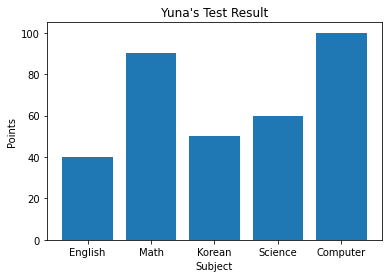

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

## 4-3. 간단한 그래프 그리기(1) 막대그래프 그려보기

### 데이터 정의
---

In [9]:
import matplotlib.pyplot as plt
# IPython에서 사용하는 매직 메서드.
# Rich output : (그래프, 소리 등과 같은 결과물)에 대한 표현 방식
%matplotlib inline

# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

### 축 그리기
---

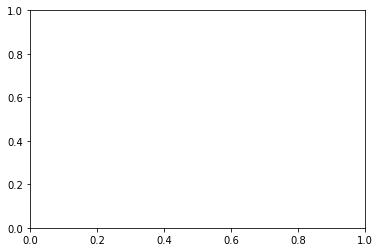

In [10]:
# 축 그리기
fig = plt.figure() #도화지(그래프) 객체 생성
ax1 = fig.add_subplot(1,1,1) #figure()객체에 add_subplot 메서드를 이용해 축을 그려준다.

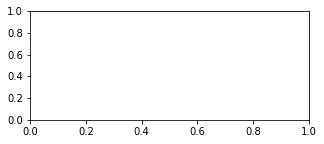

In [11]:
fig = plt.figure(figsize=(5,2))
ax1 = fig.add_subplot(1,1,1)

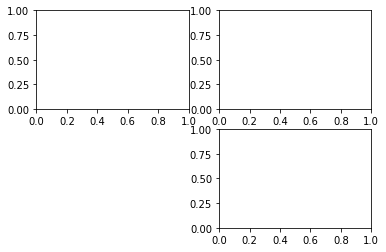

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

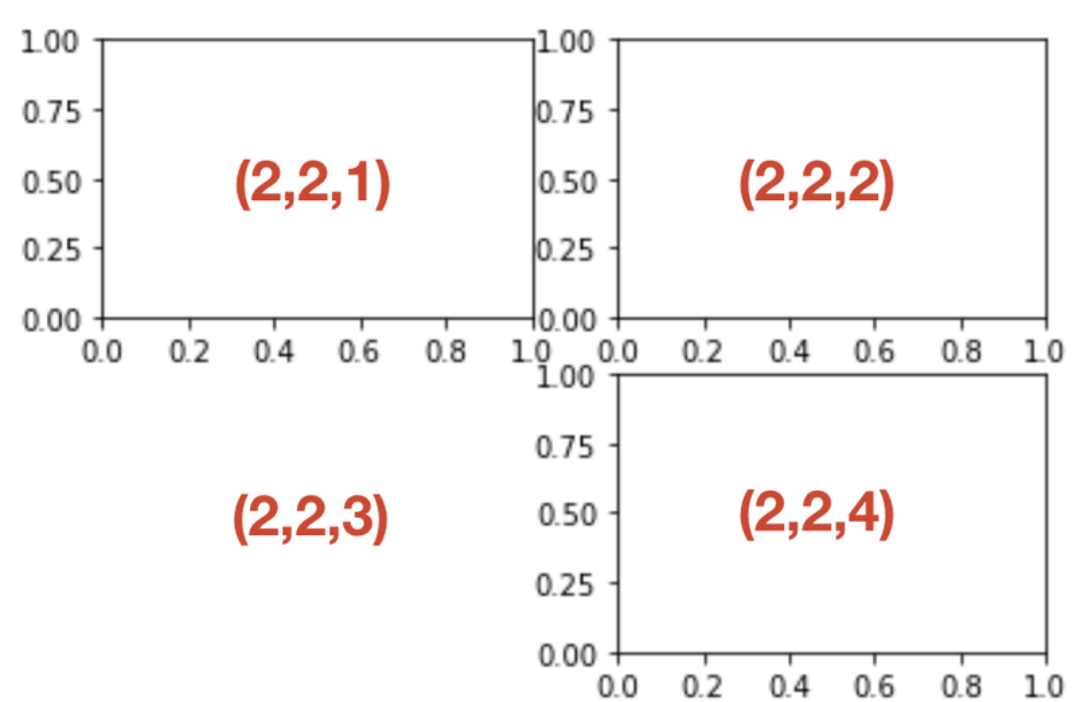

<BarContainer object of 5 artists>

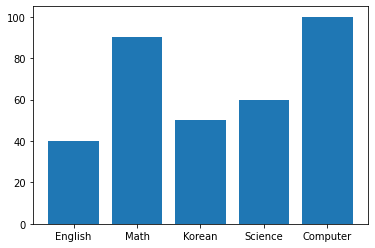

In [13]:
# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject,points)

### 그래프 요소 추가
---

***label, title***

Text(0.5, 1.0, "Henry's Test Result")

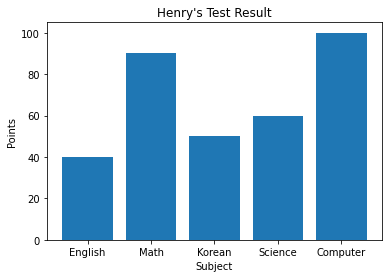

In [15]:
# Q. 아래 코드의 빈칸을 채워주세요.
# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Henry's Test Result")

## 4-4. 간단한 그래프 그리기(2) 선 그래프 그려보기

### 데이터 정의
---
아마존 주가 데이터(https://finance.yahoo.com/quote/AMZN/history?p=AMZN)

```C
$ mkdir -p ~/aiffel/data_visualization
$ ln -s ~/data ~/aiffel/data_visualization/
```

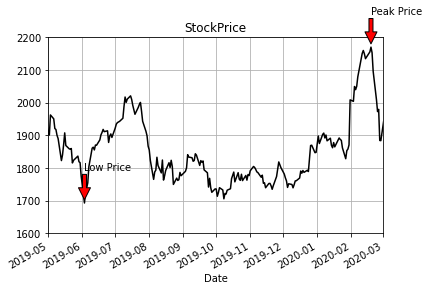

In [17]:
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/workplace/240523-data-visualization/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100), # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

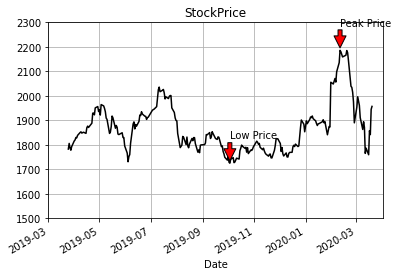

In [24]:
# Q. 날짜별 종가(Close)가 아닌 최고가(High) 데이터를 이용해서 위와 같은 그래프를 그려보세요!
# 그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/workplace/240523-data-visualization/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['High']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1500, 2300])
plt.xlim(['2019-03-01', '2020-04-02'])

# 날짜 정보를 python datetime 자료형으로 변환
min_date = price.idxmin().to_pydatetime()
max_date = price.idxmax().to_pydatetime()

# 주석달기
important_data = [(min_date, "Low Price"), (max_date, "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10),
                xytext=(d, price.asof(d)+100),
                arrowprops=dict(facecolor='red'))

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

## 4-5. 간단한 그래프 그리기(3) plot 사용법 상세

### plt.plot()로 그래프 그리기
---

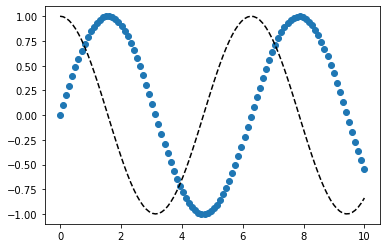

In [28]:
import numpy as np

# 0에서 10까지 균등한 가격으로 100개의 숫자를 만들라는 뜻입니다.
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '--', color='black')
plt.show()

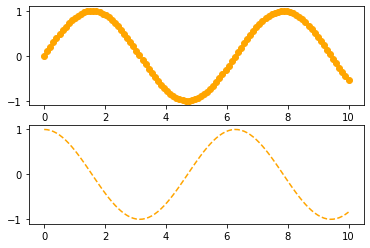

In [30]:
x = np.linspace(0, 10, 100)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), 'o', color='orange')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), '--', color='orange')
plt.show()

### linestyle, marker 옵션
---

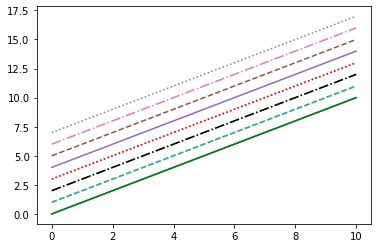

In [31]:
x = np.linspace(0, 10, 100)

plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

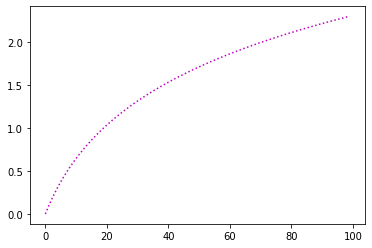

In [35]:
# Q. y=log(x)의 그래프를 그려봅시다.
# 라인 스타일은 dashdot, 색상은 'm'(magenta)으로 지정해주세요!
x = np.linspace(1, 10, 100)
y = np.log(x)

plt.plot(y, ':m')
plt.show()

### Pandas로 그래프 그리기
---

**pandas.plot 메서드 인자**
- label: 그래프의 범례 이름
- ax: 그래프를 그릴 matplotlib의 서브플롯 객체
- style: matplotlib에 전달할 'ko--'같은 스타일의 문자열
- alpha: 투명도 (0 ~1)
- kind: 그래프의 종류: line, bar, barh, kde
- logy: Y축에 대한 로그 스케일
- use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
- rot: 눈금 이름을 로테이션(0 ~ 360)
- xticks, yticks: x축, y축으로 사용할 값
- xlim, ylim: x축, y축 한계
- grid: 축의 그리드 표시할지 여부

**pandas의 data가 DataFrame 일 때 plot 메서드 인자**
- subplots: 각 DataFrame의 칼럼(column)을 독립된 서브플롯에 그립니다.
- sharex: subplots=True면 같은 X축을 공유하고 축의 범위와 눈금을 연결합니다.
- sharey: subplots=True면 같은 Y축을 공유합니다.
- figsize: 그래프의 크기를 지정합니다. (튜플)
- title: 그래프의 제목을 지정합니다. (문자열)
- sort_columns: 칼럼을 알파벳 순서로 그립니다.

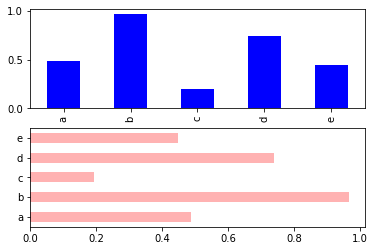

In [37]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)
plt.show()

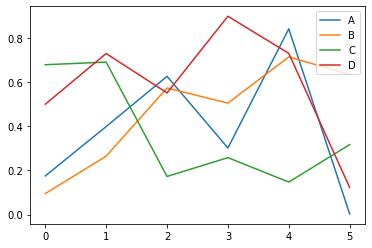

In [38]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A', 'B', 'C', 'D']))
df.plot(kind='line')
plt.show()

## 4-6. 간단한 그래프 그리기(4) 정리해 보자

### 정리
---

1. fig = plt.figure(): figure 객체를 선언해 '도화지를 펼쳐'줍니다.
2. ax1 = fig.add_subplot(1,1,1): 축을 그립니다.
3. ax1.bar(x, y) 축 안에 어떤 그래프를 그릴지 메서드를 선택한 다음, 인자로 데이터를 넣어줍니다.
4. 그래프 타이틀 축의 레이블 등을 plt의 여러 메서드 grid, xlabel, ylabel 을 이용해서 추가해 주고
5. plt.savefig 메서드를 이용해 저장해줍니다.

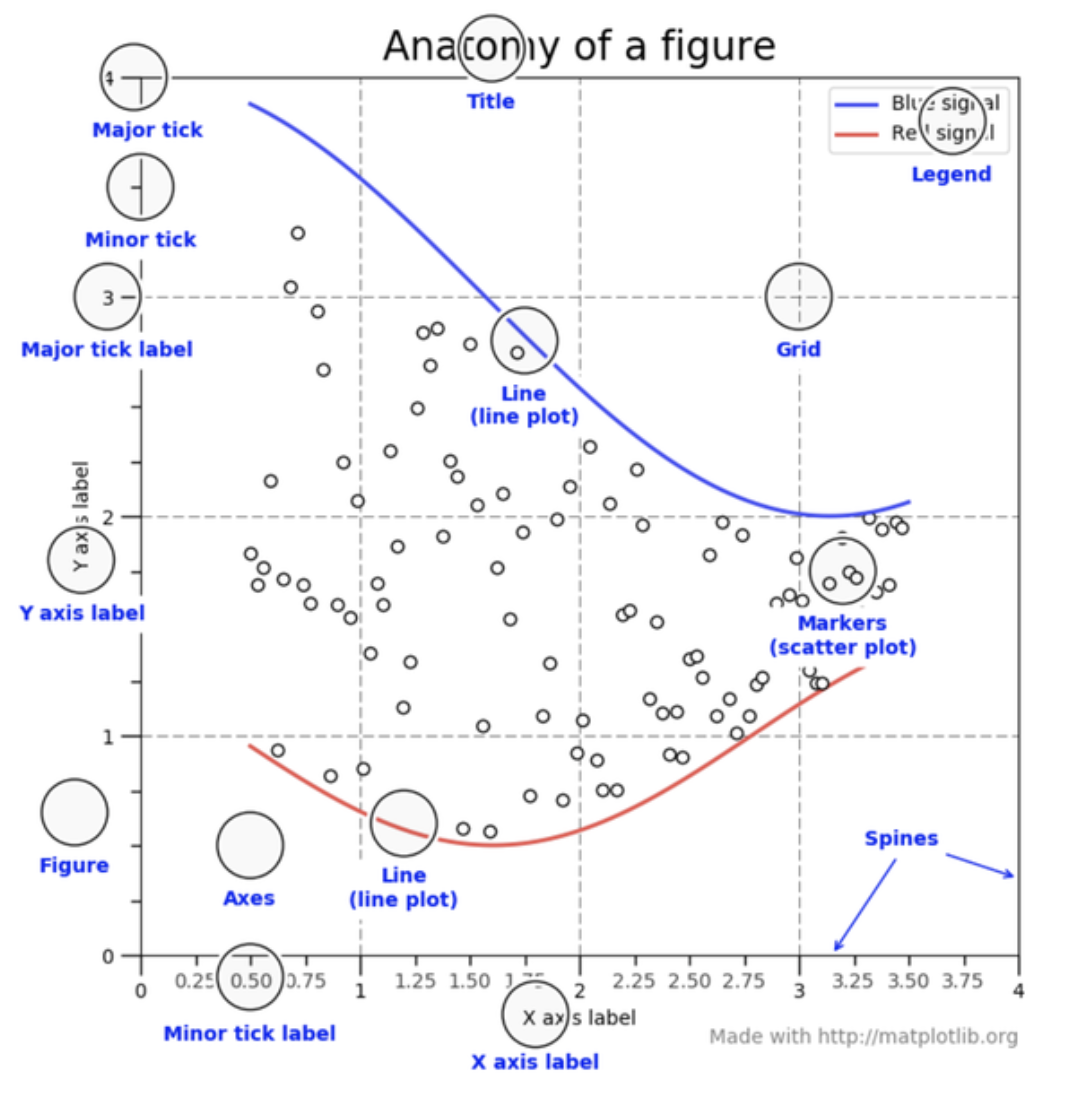

## 4-7. 그래프 4대 천왕(1) 데이터 준비

### 데이터 준비
---

**1) 데이터 불러오기**
- https://github.com/mwaskom/seaborn-data
- default directory: ~/seaborn-data/ (~(물결표시)는 home directory를 의미합니다.😃)
- https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

In [39]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

**2) 데이터 불러오기**

In [41]:
# dataframe의 처음 다섯 줄을 보여줍니다.
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
df.shape

(244, 7)

In [43]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [45]:
# Q. 다음 코드의 빈칸을 채워주세요.

# 'sex' 변수의 카테고리별 개수
print(df['sex'].value_counts())
print("===========================")

# 'time' 변수의 카테고리별 개수
print(df['time'].value_counts())
print("===========================")

# 'smoker' 변수의 카테고리별 개수
print(df['smoker'].value_counts())
print("===========================")

# 'day' 변수의 카테고리별 개수
print(df['day'].value_counts())
print("===========================")

# 'size' 변수의 카테고리별 개수
print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


## 4-8. 그래프 4대 천왕(2) 범주형 데이터

### 범주형 데이터
---

**1) 막대그래프(bar graph)**

1-1) Pandas와 Matplotlib를 활용한 방법

In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
grouped = df['tip'].groupby(df['sex'])

In [48]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [49]:
grouped.size()

sex
Male      157
Female     87
Name: tip, dtype: int64

In [50]:
import numpy as np
sex = dict(grouped.mean())
sex

{'Male': 3.0896178343949043, 'Female': 2.833448275862069}

In [51]:
x = list(sex.keys())
x

['Male', 'Female']

In [53]:
y = list(sex.values())
y

[3.0896178343949043, 2.833448275862069]

Text(0.5, 1.0, 'Tip by Sex')

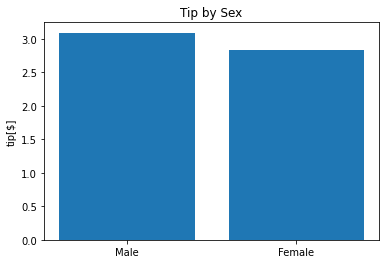

In [54]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

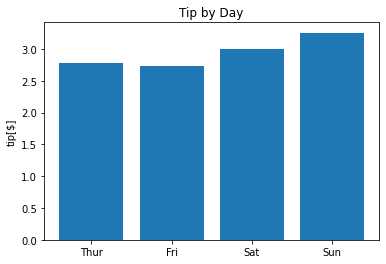

In [59]:
# Q. 요일(day)에 따른 평균 tip의 그래프를 그려보세요.

group_by_day = df['tip'].groupby(df['day'])
day = dict(group_by_day.mean())

x2 = list(day.keys())
y2 = list(day.values())

plt.bar(x = x2, height = y2)

plt.ylabel('tip[$]')
plt.title('Tip by Day')
plt.show()

In [57]:
group_by_day.mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [58]:
group_by_day.size()

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: tip, dtype: int64

**1-2) Seaborn과 Matplotlib을 활용한 간단한 방법**

<AxesSubplot:xlabel='sex', ylabel='tip'>

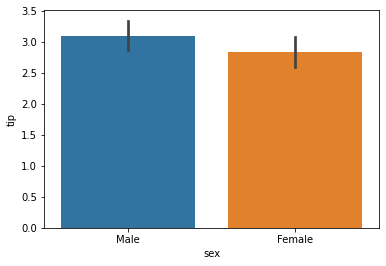

In [61]:
sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by sex')

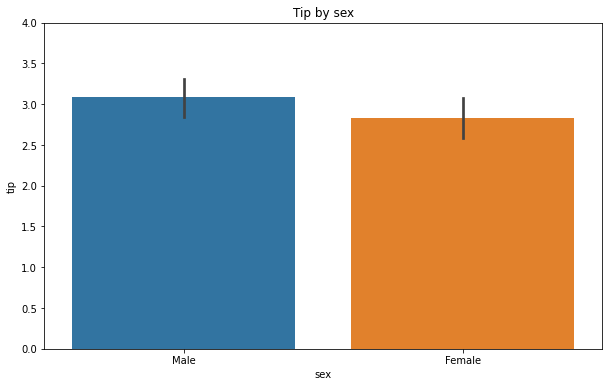

In [62]:
plt.figure(figsize=(10,6)) # 도화지 사이즈를 정합니다.
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위를 정합니다.
plt.title('Tip by sex') # 그래프 제목을 정합니다.

Text(0.5, 1.0, 'Tip by day')

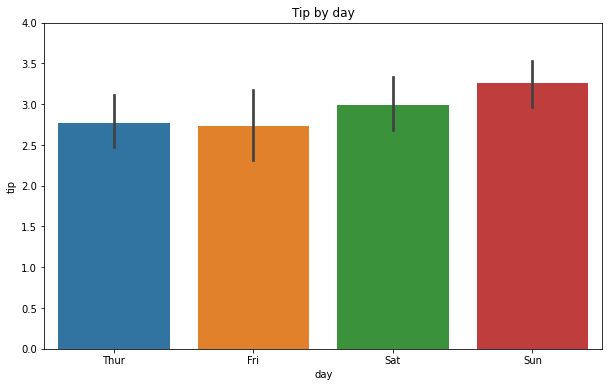

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

<AxesSubplot:xlabel='day', ylabel='tip'>

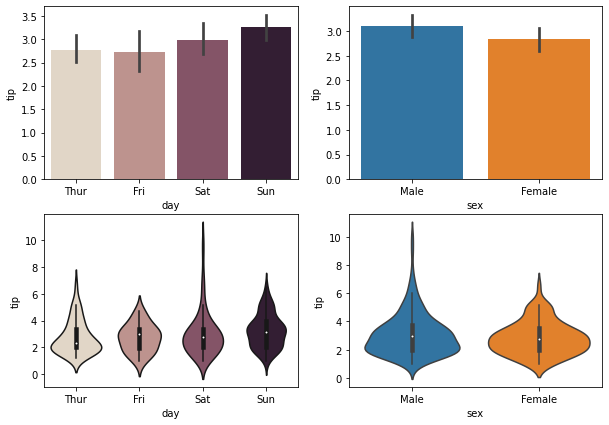

In [65]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

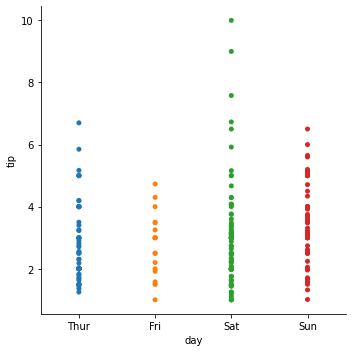

In [66]:
sns.catplot(x="day", y="tip", jitter=False, data=tips)